<a href="https://colab.research.google.com/github/ChoeTaeBin/Machine-Learnig/blob/main/KNeighborsRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K최근접 이웃 방식을 이용한 회기
k개의 이웃들의 종속변수의 평균을 나의 종속변수로 예측하는 것일 뿐이다.
k가 커지면 -> 국지적 패턴에 둔감 -> 단순한 모델 -> 과소 적합
k가 작아지면 -> 국지적 패턴에 민감 -> 복잡한 모델 -> 과대적합

In [9]:
import numpy as np

# 독립 변수(길이)
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

#종속 변수(무게)
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [10]:
# 훈련 데이터, 테스트 데이터 분할
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

#2차원 배열로 바꿈(훈련 데이터는 2차원 배열 꼴이어야함)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [11]:
# 모델만들기, 훈련, 평가
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor() #생성
knr.fit(train_input, train_target) #훈련

print('test data score: ',knr.score(test_input, test_target)) #결정계수를 살핌
print('train data score: ',knr.score(train_input, train_target))

test data score:  0.9774154656426239
train data score:  0.9736062015124255


In [12]:
#절댓값 오차 계산
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

30.755714285714284


K값에 따른 과대적합 과소적합 보기

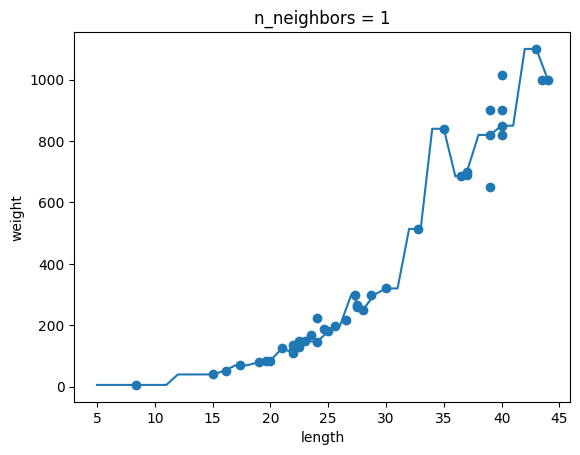

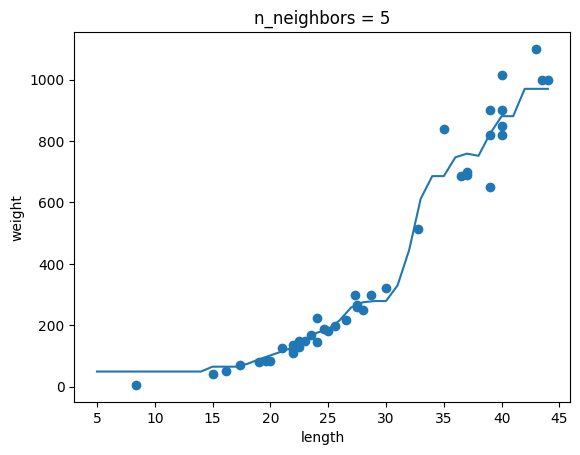

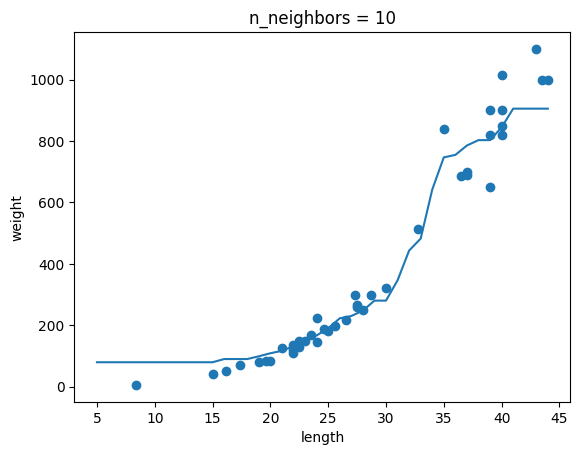

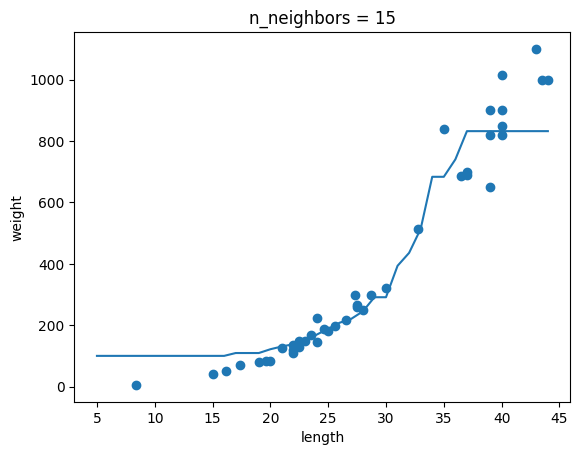

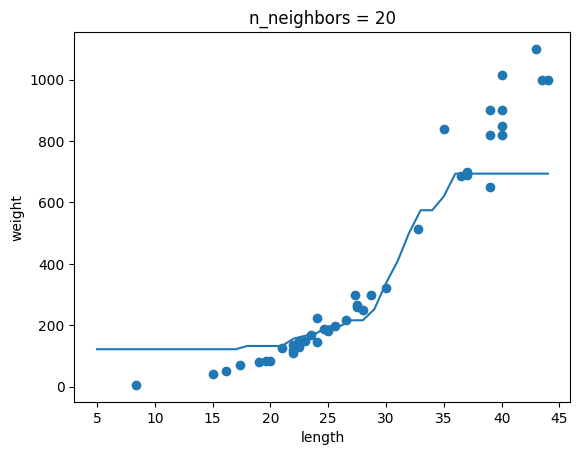

In [16]:
import matplotlib.pyplot as plt

kn = KNeighborsRegressor()

x = np.arange(5,45) #5~45까지 x좌표를 만듦
x = x.reshape(-1,1) #이차원 배열로 만들기

#k값을 바꾸어 가며
for k in [1,5,10,15,20]:
  knr.n_neighbors = k
  knr.fit(train_input, train_target)
  prediction = knr.predict(x) #y값을 예측

  plt.scatter(train_input, train_target) #훈련데이터 산점도
  plt.plot(x, prediction) #모델
  plt.title('n_neighbors = {}'.format(k)) #제목
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()
